<a href="https://colab.research.google.com/github/shuvayan/AIMLOPS/blob/main/M5_NB_MiniProject_1_ResumeClassification_Using_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project 1: Resume Classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data preprocessing, EDA on the resume dataset
* fine-tune Bert model for resume classification

## Dataset Description

The data is in CSV format, with two features: Category, and Resume.

**Category** -  Industry sector to which the resume belongs to, and

**Resume** - The complete CV (text) of the candidate.

##  Grading = 10 Points

## Information

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task. Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decisionmaking.

To learn more about this, click [here](https://www.sciencedirect.com/science/article/pii/S187705092030750X).

**Problem Statement:** Fine-tune a pre-trained Bert model for resume classification.

*For fine-tuning Bert, refer to the demo session on 'HuggingFace platform' held on 17 Aug.*

### Install dependencies

After installing the below dependencies ***Restart the session/runtime***.

In [ ]:
!pip -q uninstall pyarrow -y
!pip -q install pyarrow==15.0.2
!pip -q install datasets
!pip -q install accelerate
!pip -q install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 9.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 15.0.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00


### <font color="#990000">Restart Session/Runtime</font>

### Import required packages

In [ ]:
from datasets import Dataset, DatasetDict

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Downloading the data

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/UpdatedResumeDataSet.csv
!ls | grep '.csv'

UpdatedResumeDataSet.csv


**Exercise 1: Read the UpdatedResumeDataset.csv dataset [0.5 Mark]**

**Hint:** pd.read_csv( , encoding='utf-8')

In [ ]:
# Read the dataset
# YOUR CODE HERE
df = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')

### Pre-processing and EDA

**Exercise 2: Display  all the categories of resumes and their counts in the dataset [0.5 Mark]**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
# Display the distinct categories of resume
# YOUR CODE HERE
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
# Displaying the number of distinct categories of resume
# YOUR CODE HERE
len(df['Category'].unique())

25

<Axes: ylabel='Category'>

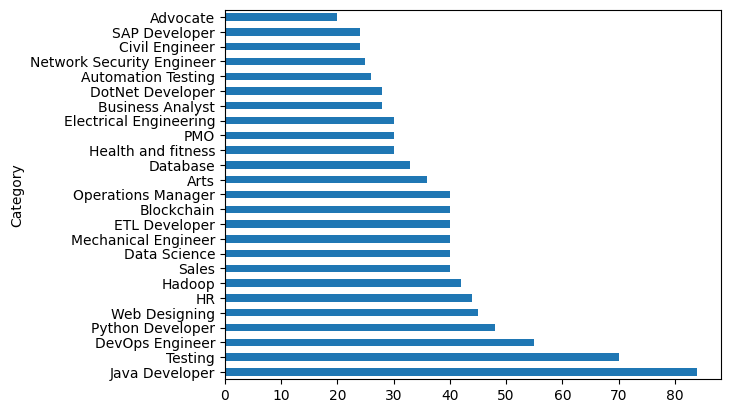

In [ ]:
# Display the distinct categories of resume and the number of records belonging to each category
# YOUR CODE HERE
df['Category'].value_counts().plot(kind='barh')

**Exercise 3: Create the count plot of different categories [0.5 Mark]**

**Hint:** Use `sns.countplot()`

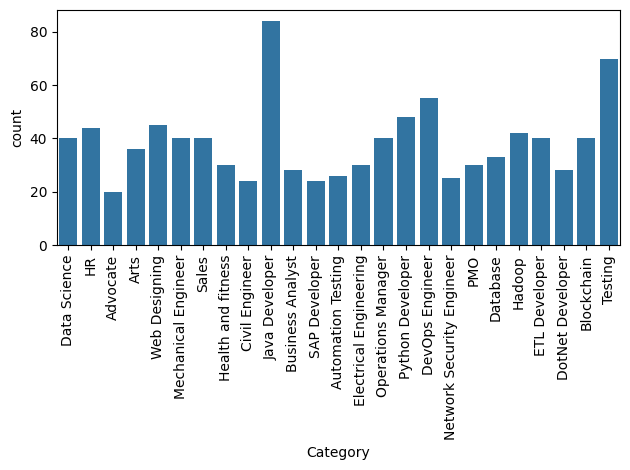

In [ ]:
# YOUR CODE HERE
plt.figure()  # No need to specify figsize for tight layout
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to fit all elements within the figure bounds
plt.show()

**Exercise 4: Create a pie plot depicting the percentage of resume distributions category-wise. [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

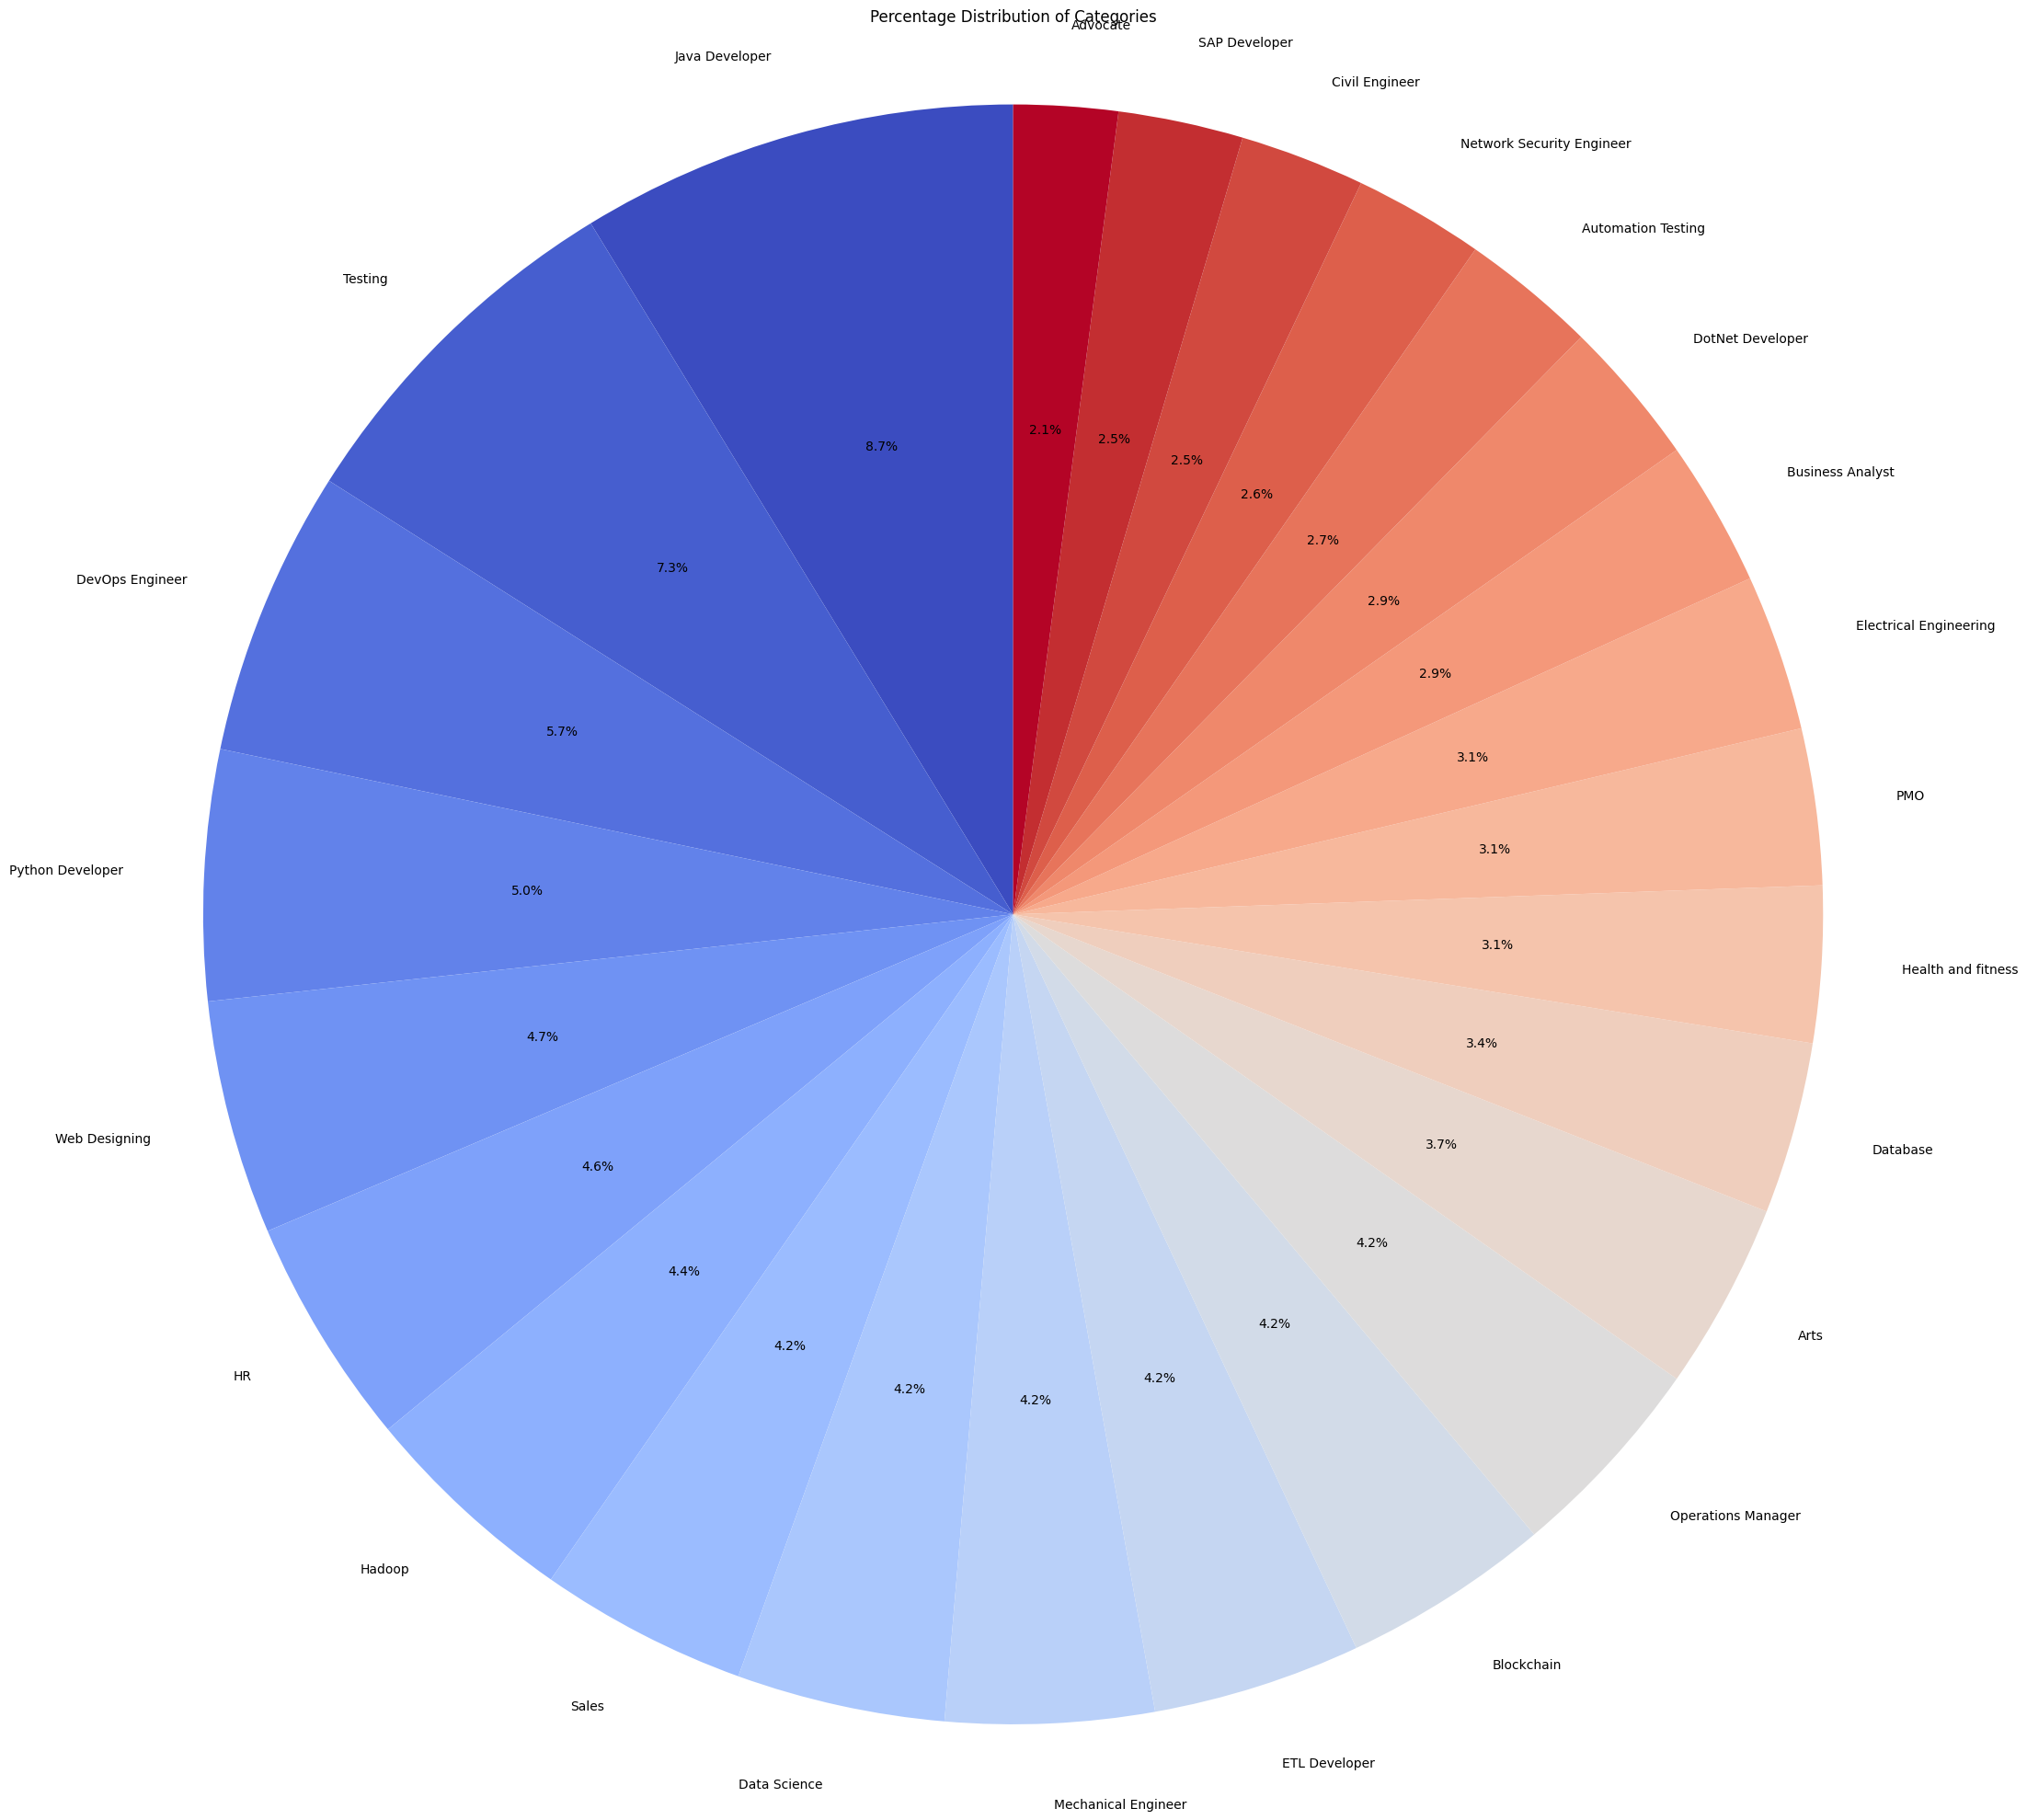

In [ ]:
targetCounts = df['Category'].value_counts()
targetLabels  = targetCounts.index
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.pie(targetCounts, labels=targetCounts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.get_cmap('coolwarm')(np.linspace(0, 1, len(targetCounts))))
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Percentage Distribution of Categories')
# YOUR CODE HERE to display pie chart with color coding (eg. `coolwarm`)
plt.show()

**Exercise 5: Convert all the `Resume` text to lower case and remove trailing spaces [0.5 Mark]**




In [ ]:
# Convert all characters to lowercase and remove trailing spaces
# YOUR CODE HERE
df['Resume'] = df['Resume'].str.lower().str.strip()

### Cleaning Resume

**Exercise 6: Define a function to clean the resume text [2 Mark]**

In the text there are special characters, urls, hashtags, mentions, etc. You need to remove for the following:  

* URLs: For reference click [here](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)
* RT | cc: For reference click [here](https://www.machinelearningplus.com/python/python-regex-tutorial-examples/)
* Hashtags, # and Mentions, @
* punctuations
* extra whitespace

PS: Use the provided reference similarly for removing any other such elements.

After cleaning as above, store the Resume Text in a separate column (New Feature say `Cleaned_Resume`).


In [ ]:
import re
def cleanResume(resumeText):
    # YOUR CODE HERE
    # Remove URLs

    resumeText = re.sub(r'http\S+', '', resumeText)
    resumeText = re.sub('RT|cc','', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', '', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}â¢~"""), '', resumeText)  # remove punctuations
    resumeText = re.sub('\s+', ' ', resumeText)
    # resumeText = re.sub('[^A-Za-z0-9]+', '', resumeText)
    return resumeText


In [ ]:
# Apply the function defined above and save the
df['Cleaned_Resume'] =  df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df ['Cleaned_Resume'].head(5)

,Cleaned_Resume
0,skills programming languages python pandas num...
1,education details may 2013 to may 2017 be uitr...
2,areas of interest deep learning control system...
3,skills r python sap hana tableau sap hana sql ...
4,education details mca ymcaust faridabad haryan...


**Exercise 7: Convert the categorical variable `Category` to a numerical feature and make a different column <font color="#990000">`label`</font>, which can be treated as the target variable [0.5 Mark]**

**Hint:** Use [`sklearn.preprocessing.LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method

In [ ]:
from sklearn.preprocessing import LabelEncoder

# YOUR CODE HERE
le = LabelEncoder()
df['label'] = le.fit_transform(df['Category'])
df.tail(10)

,Category,Resume,Cleaned_Resume,label
952,Testing,"personal skills â¢ quick learner, â¢ eagerne...",personal skills quick learner eagerness to lea...,23
953,Testing,computer skills & software knowledge ms-power ...,computer skills software knowledge mspower poi...,23
954,Testing,skill set os windows xp/7/8/8.1/10 database my...,skill set os windows xp788110 database mysql s...,23
955,Testing,â¢ good logical and analytical skills â¢ pos...,good logical and analytical skills positive a...,23
956,Testing,computer proficiency â¢ basic: ms-office (pow...,computer proficiency basic msoffice powerpoint...,23
957,Testing,computer skills: â¢ proficient in ms office (...,computer skills proficient in ms office word b...,23
958,Testing,â willingness to accept the challenges. â ..., willingness to aept the challenges  posit...,23
959,Testing,"personal skills â¢ quick learner, â¢ eagerne...",personal skills quick learner eagerness to lea...,23
960,Testing,computer skills & software knowledge ms-power ...,computer skills software knowledge mspower poi...,23
961,Testing,skill set os windows xp/7/8/8.1/10 database my...,skill set os windows xp788110 database mysql s...,23


**Exercise 8: Plot the histogram of words count of `Cleaned_Resume` text [0.5 Mark]**

**Hint:** Use sns.distplot()

In [ ]:
df['Word_Count'] = df['Cleaned_Resume'].apply(lambda x: len(x.split()))

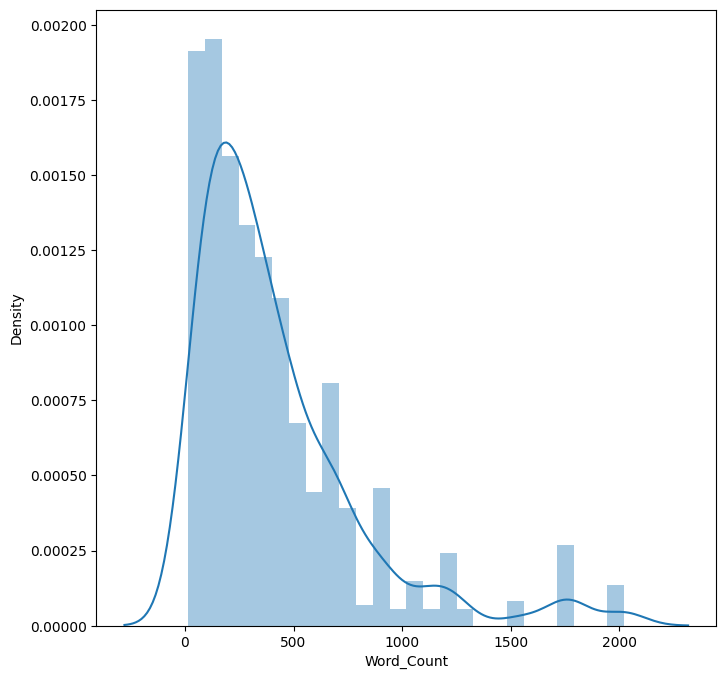

In [ ]:
plt.figure(figsize= (8, 8))

# YOUR CODE HERE
sns.distplot(df['Word_Count'])

plt.show()

### Train Test Split

**Exercise 9: Split the dataset into training, validation, and testing set [0.5 Mark]**

* Do stratified splitting using `label` column

In [ ]:
train_test_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, test_df =  train_test_split(train_test_df, test_size=0.2, random_state=42, stratify=train_test_df['label'])# YOUR CODE HERE to split data

len(train_df), len(val_df), len(test_df)

(615, 193, 154)

In [ ]:
train_df.head(2)

,Category,Resume,Cleaned_Resume,label,Word_Count
591,Python Developer,training attended: 1. successfully completed e...,training attended 1 suessfully completed esd p...,20,319
713,Database,education details \r\njanuary 2016 bsc. mumba...,education details january 2016 bsc mumbai maha...,7,342


In [ ]:
val_df.label.nunique()

25

### Convert to HuggingFace Dataset

**Exercise 10: Convert Pandas dataframe to HuggingFace Dataset [1 Mark]**

**Hint:**

    import pandas as pd
    from datasets import Dataset, DatasetDict

    tdf = pd.DataFrame({"a": [1, 2, 3], "b": ['hello', 'ola', 'thammi']})
    vdf = pd.DataFrame({"a": [4, 5, 6], "b": ['four', 'five', 'six']})
    tds = Dataset.from_pandas(tdf)
    vds = Dataset.from_pandas(vdf)

    ds = DatasetDict()

    ds['train'] = tds
    ds['validation'] = vds

    print(ds)

In [ ]:
test_df.Category.nunique()

25

In [ ]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(train_df) # YOUR CODE HERE
val_ds = Dataset.from_pandas(val_df) # YOUR CODE HERE
test_ds = Dataset.from_pandas(test_df) # YOUR CODE HERE

ds = DatasetDict()

ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

### Tokenizer

**Exercise 11: Load tokenizer for checkpoint `distilbert-base-uncased` [0.5 Mark]**

**Hint:** `AutoTokenizer`

In [ ]:
# Load tokenizer
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
def tokenize_fn(batch):
    # YOUR CODE HERE..
    return tokenizer(batch['Cleaned_Resume'], padding=True, truncation=True)

In [ ]:
tokenized_datasets = ds.map(tokenize_fn, batched=True)
tokenized_datasets

Map:   0%|          | 0/615 [00:00<?, ? examples/s]

Map:   0%|          | 0/193 [00:00<?, ? examples/s]

Map:   0%|          | 0/154 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Word_Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 615
    })
    validation: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Word_Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 193
    })
    test: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Word_Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 154
    })
})

### Load Pre-Trained Model

**Exercise 12: Load pre-trained Bert model with checkpoint `distilbert-base-uncased` and show model summary [0.5 Mark]**

**Hint:** `AutoModelForSequenceClassification`

In [ ]:
from transformers import AutoModelForSequenceClassification
model =AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=25)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
len(df['Category'].unique())

25

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           19,225
├─Dropout: 1-4                                          --
Total params: 66,972,697
Trainable params: 66,972,697
Non-trainable params: 0

**Exercise 13: Freeze/Un-Freeze different layers  [0.5 Mark]**

**Hint:** Freeze layers starting with name *distilbert*


In [ ]:
# Display layers name
for name, param in model.named_parameters():
    print(name)
    if name.startswith("distilbert"): # choose whatever you like here
        param.requires_grad = False
# YOUR CODE HERE

distilbert.embeddings.word_embeddings.weight
distilbert.embeddings.position_embeddings.weight
distilbert.embeddings.LayerNorm.weight
distilbert.embeddings.LayerNorm.bias
distilbert.transformer.layer.0.attention.q_lin.weight
distilbert.transformer.layer.0.attention.q_lin.bias
distilbert.transformer.layer.0.attention.k_lin.weight
distilbert.transformer.layer.0.attention.k_lin.bias
distilbert.transformer.layer.0.attention.v_lin.weight
distilbert.transformer.layer.0.attention.v_lin.bias
distilbert.transformer.layer.0.attention.out_lin.weight
distilbert.transformer.layer.0.attention.out_lin.bias
distilbert.transformer.layer.0.sa_layer_norm.weight
distilbert.transformer.layer.0.sa_layer_norm.bias
distilbert.transformer.layer.0.ffn.lin1.weight
distilbert.transformer.layer.0.ffn.lin1.bias
distilbert.transformer.layer.0.ffn.lin2.weight
distilbert.transformer.layer.0.ffn.lin2.bias
distilbert.transformer.layer.0.output_layer_norm.weight
distilbert.transformer.layer.0.output_layer_norm.bias
distil

In [ ]:
# Display layers gradient
for name, param in model.named_parameters():
     print(name, param.requires_grad)
# YOUR CODE HERE..

distilbert.embeddings.word_embeddings.weight False
distilbert.embeddings.position_embeddings.weight False
distilbert.embeddings.LayerNorm.weight False
distilbert.embeddings.LayerNorm.bias False
distilbert.transformer.layer.0.attention.q_lin.weight False
distilbert.transformer.layer.0.attention.q_lin.bias False
distilbert.transformer.layer.0.attention.k_lin.weight False
distilbert.transformer.layer.0.attention.k_lin.bias False
distilbert.transformer.layer.0.attention.v_lin.weight False
distilbert.transformer.layer.0.attention.v_lin.bias False
distilbert.transformer.layer.0.attention.out_lin.weight False
distilbert.transformer.layer.0.attention.out_lin.bias False
distilbert.transformer.layer.0.sa_layer_norm.weight False
distilbert.transformer.layer.0.sa_layer_norm.bias False
distilbert.transformer.layer.0.ffn.lin1.weight False
distilbert.transformer.layer.0.ffn.lin1.bias False
distilbert.transformer.layer.0.ffn.lin2.weight False
distilbert.transformer.layer.0.ffn.lin2.bias False
distilbe

### Metrics

In [ ]:
from datasets import load_metric
metric = load_metric("glue", "sst2")         # Type 'Y' when prompted

In [ ]:
metric.compute(predictions=[1,0,1], references=[1,0,1])

{'accuracy': 1.0}

In [ ]:
def compute_metrics(logits_and_labels):
    logits, labels = logits_and_labels
    predictions = np.argmax(logits,axis=-1)
    return metric.compute(predictions=predictions,references=labels)


**Exercise 14: Fine-tune model on train dataset  [0.5 Mark]**
 * Create `TrainingArguments` class object
 * Create `Trainer` class  object
 * Train it for higher number of epochs say 40 or 50
 * Switch to GPU runtime if needed

**Hint:** Check if the training code is running without any error with CPU runtime, later switch to GPU runtime for faster training. Once trained, save the model, create its zip file, and download into your system.

In [ ]:
from transformers import TrainingArguments
from transformers import Trainer

In [ ]:
# Set up the training arguments

model_output_path = "/content/bert_model"

training_args = TrainingArguments(
    output_dir=model_output_path,
    per_device_train_batch_size=5,
    per_device_eval_batch_size=5,
    evaluation_strategy='epoch',save_strategy='epoch',
    num_train_epochs=40)

In [ ]:
# Train the model
trainer = Trainer(
    model=model, args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,3.121436,0.088083
2,No log,3.054062,0.129534
3,No log,2.994827,0.139896
4,No log,2.929799,0.145078
5,3.075100,2.863219,0.155440
6,3.075100,2.796257,0.238342
7,3.075100,2.730641,0.238342
8,3.075100,2.665089,0.290155
9,2.796900,2.606665,0.295337
10,2.796900,2.545119,0.352332


TrainOutput(global_step=4920, training_loss=2.2119087033155487, metrics={'train_runtime': 661.3701, 'train_samples_per_second': 37.196, 'train_steps_per_second': 7.439, 'total_flos': 3260034634752000.0, 'train_loss': 2.2119087033155487, 'epoch': 40.0})

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Word_Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 615
    })
    validation: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Word_Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 193
    })
    test: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Word_Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 154
    })
})

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
# Save the model
trainer.save_model('saved_bert_model')

In [ ]:
!ls

bert_model  sample_data  saved_bert_model  UpdatedResumeDataSet.csv


In [ ]:
# Create a Zip file and download
!zip -r saved_bert_model.zip saved_bert_model

  adding: saved_bert_model/ (stored 0%)
  adding: saved_bert_model/tokenizer_config.json (deflated 76%)
  adding: saved_bert_model/vocab.txt (deflated 53%)
  adding: saved_bert_model/config.json (deflated 64%)
  adding: saved_bert_model/tokenizer.json (deflated 71%)
  adding: saved_bert_model/training_args.bin (deflated 51%)
  adding: saved_bert_model/model.safetensors (deflated 8%)
  adding: saved_bert_model/special_tokens_map.json (deflated 42%)


### Load Model

**Exercise 15: Load the saved model and create a pipeline to perform text classification [1 Mark]**

 * Create the pipeline object for text classification
 * Create a `make_prediction` function to use pipeline object and output the prediction label

**Hint:** pipeline()

In [ ]:
from transformers import pipeline

In [ ]:
my_model = pipeline('text-classification',model='saved_bert_model', device=0)

In [ ]:
# Function to predict label for a resume text

def make_prediction(input_text):
    mm = my_model(input_text)
    desig = {"Label": le.classes_[int(mm[0]['label'].split("_")[1])], "Score": mm[0]['score']}
    return desig

    # YOUR CODE HERE..


In [ ]:
# Test prediction
make_prediction('programming, web designing, coding')

{'Label': 'Java Developer', 'Score': 0.27158626914024353}

In [ ]:
make_prediction('continuous integration and continuous delivery')

{'Label': 'Hadoop', 'Score': 0.09186598658561707}

In [ ]:
make_prediction('law student and journalist')

{'Label': 'HR', 'Score': 0.2410339117050171}

In [ ]:
make_prediction('machine learning, data, EDA, big data, neural networks')

{'Label': 'Java Developer', 'Score': 0.22640876471996307}

## **Optional**: Create a Gradio based web interface to test and display the model predictions

In [ ]:
!pip -q install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.5 MB/s eta 0:00:00


In [ ]:
import gradio

In [ ]:
# Textbox to take Input from user
in_text = gradio.Textbox(lines=10, placeholder=None, value="Enter resume text here", label='Resume Text')


# Textbox to display Output prediction
out_label = gradio.Textbox(type="text", label='Predicted Class Label')


# Gradio interface to create UI
iface = gradio.Interface(fn = make_prediction,             # fine-tuned model is used inside this function
                         inputs = [in_text],
                         outputs = [out_label],
                         title = "Resume Classification",
                         description = "Using fine-tuned Bert model",
                         allow_flagging = 'never')


# Launch interface
iface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5ae30f7528bfc001d5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
le.classes_[1]

'Arts'